 # House Sales in King County, USA
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

 ## 1. Data upload and first study

In [1032]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', '{:.6f}'.format)

In [1034]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/House_Sales/kc_house_data.csv')

In [1036]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

id             date          price  bedrooms  bathrooms  \
0  7129300520  20141013T000000  221900.000000         3   1.000000   
1  6414100192  20141209T000000  538000.000000         3   2.250000   
2  5631500400  20150225T000000  180000.000000         2   1.000000   
3  2487200875  20141209T000000  604000.000000         4   3.000000   
4  1954400510  20150218T000000  510000.000000         3   2.000000   
5  7237550310  20140512T000000 1225000.000000         4   4.500000   
6  1321400060  20140627T000000  257500.000000         3   2.250000   
7  2008000270  20150115T000000  291850.000000         3   1.500000   
8  2414600126  20150415T000000  229500.000000         3   1.000000   
9  3793500160  20150312T000000  323000.000000         3   2.500000   

   sqft_living  sqft_lot   floors  waterfront  view  ...  grade  sqft_above  \
0         1180      5650 1.000000           0     0  ...      7        1180   
1         2570      7242 2.000000           0     0  ...      7        2170   
2          770     10000 1.000000           0     0  ...      6         770   
3         1960      5000 1.000000           0     0  ...      7        1050   
4         1680      8080 1.000000           0     0  ...      8        1680   
5         5420    101930 1.000000           0     0  ...     11        3890   
6         1715      6819 2.000000           0     0  ...      7        1715   
7         1060      9711 1.000000           0     0  ...      7        1060   
8         1780      7470 1.000000           0     0  ...      7        1050   
9         1890      6560 2.000000           0     0  ...      7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode       lat        long  \
0              0      1955             0    98178 47.511200 -122.257000   
1            400      1951          1991    98125 47.721000 -122.319000   
2              0      1933             0    98028 47.737900 -122.233000   
3            910      1965             0    98136 47.520800 -122.393000   
4              0      1987             0    98074 47.616800 -122.045000   
5           1530      2001             0    98053 47.656100 -122.005000   
6              0      1995             0    98003 47.309700 -122.327000   
7              0      1963             0    98198 47.409500 -122.315000   
8            730      1960             0    98146 47.512300 -122.337000   
9              0      2003             0    98038 47.368400 -122.031000   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

id          price     bedrooms    bathrooms  sqft_living  \
count      21613.000000   21613.000000 21613.000000 21613.000000 21613.000000   
mean  4580301520.864988  540088.141767     3.370842     2.114757  2079.899736   
std   2876565571.312049  367127.196483     0.930062     0.770163   918.440897   
min      1000102.000000   75000.000000     0.000000     0.000000   290.000000   
25%   2123049194.000000  321950.000000     3.000000     1.750000  1427.000000   
50%   3904930410.000000  450000.000000     3.000000     2.250000  1910.000000   
75%   7308900445.000000  645000.000000     4.000000     2.500000  2550.000000   
max   9900000190.000000 7700000.000000    33.000000     8.000000 13540.000000   

            sqft_lot       floors   waterfront         view    condition  \
count   21613.000000 21613.000000 21613.000000 21613.000000 21613.000000   
mean    15106.967566     1.494309     0.007542     0.234303     3.409430   
std     41420.511515     0.539989     0.086517     0.766318     0.650743   
min       520.000000     1.000000     0.000000     0.000000     1.000000   
25%      5040.000000     1.000000     0.000000     0.000000     3.000000   
50%      7618.000000     1.500000     0.000000     0.000000     3.000000   
75%     10688.000000     2.000000     0.000000     0.000000     4.000000   
max   1651359.000000     3.500000     1.000000     4.000000     5.000000   

             grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count 21613.000000 21613.000000   21613.000000 21613.000000  21613.000000   
mean      7.656873  1788.390691     291.509045  1971.005136     84.402258   
std       1.175459   828.090978     442.575043    29.373411    401.679240   
min       1.000000   290.000000       0.000000  1900.000000      0.000000   
25%       7.000000  1190.000000       0.000000  1951.000000      0.000000   
50%       7.000000  1560.000000       0.000000  1975.000000      0.000000   
75%       8.000000  2210.000000     560.000000  1997.000000      0.000000   
max      13.000000  9410.000000    4820.000000  2015.000000   2015.000000   

           zipcode          lat         long  sqft_living15    sqft_lot15  
count 21613.000000 21613.000000 21613.000000   21613.000000  21613.000000  
mean  98077.939805    47.560053  -122.213896    1986.552492  12768.455652  
std      53.505026     0.138564     0.140828     685.391304  27304.179631  
min   98001.000000    47.155900  -122.519000     399.000000    651.000000  
25%   98033.000000    47.471000  -122.328000    1490.000000   5100.000000  
50%   98065.000000    47.571800  -122.230000    1840.000000   7620.000000  
75%   98118.000000    47.678000  -122.125000    2360.000000  10083.000000  
max   98199.000000    47.777600  -121.315000    6210.000000 871200.000000

In [1037]:
# Delete column "id" and zipcode(index)
df = df.drop(['id', 'zipcode'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [1040]:
# Check duplicates
df.duplicated().sum()

0

 ## 2. Analysis of data

 #### Build a matrix of dependences for target

In [1044]:
df = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]

interval columns not set, guessing: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_86570/1297827602.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


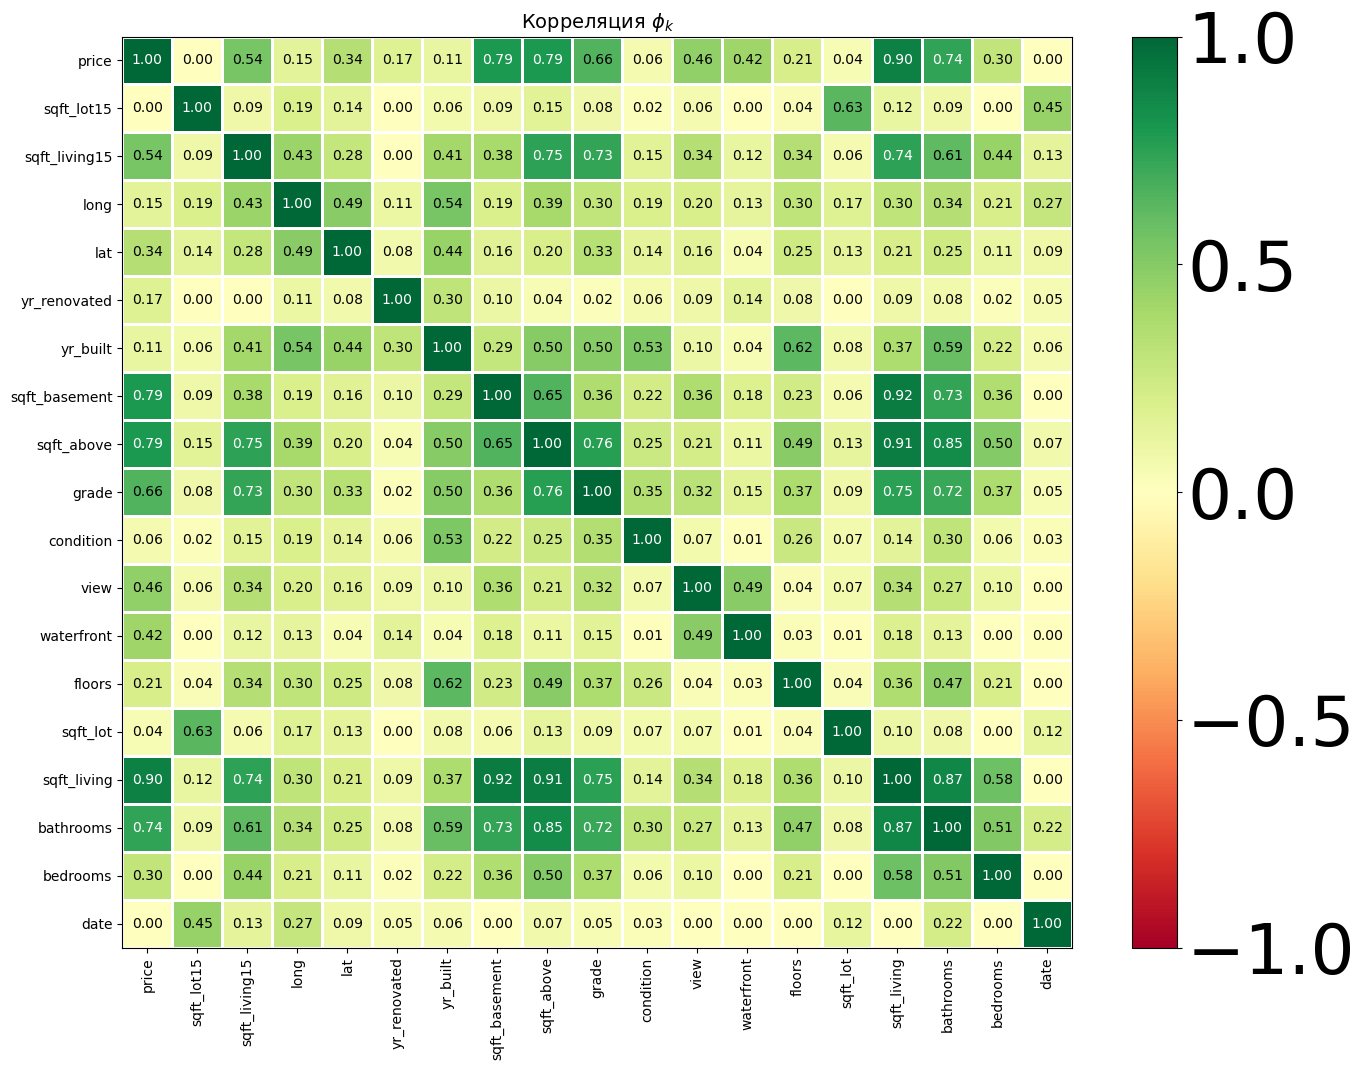

In [1046]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)

 #### Build histogram

In [1048]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

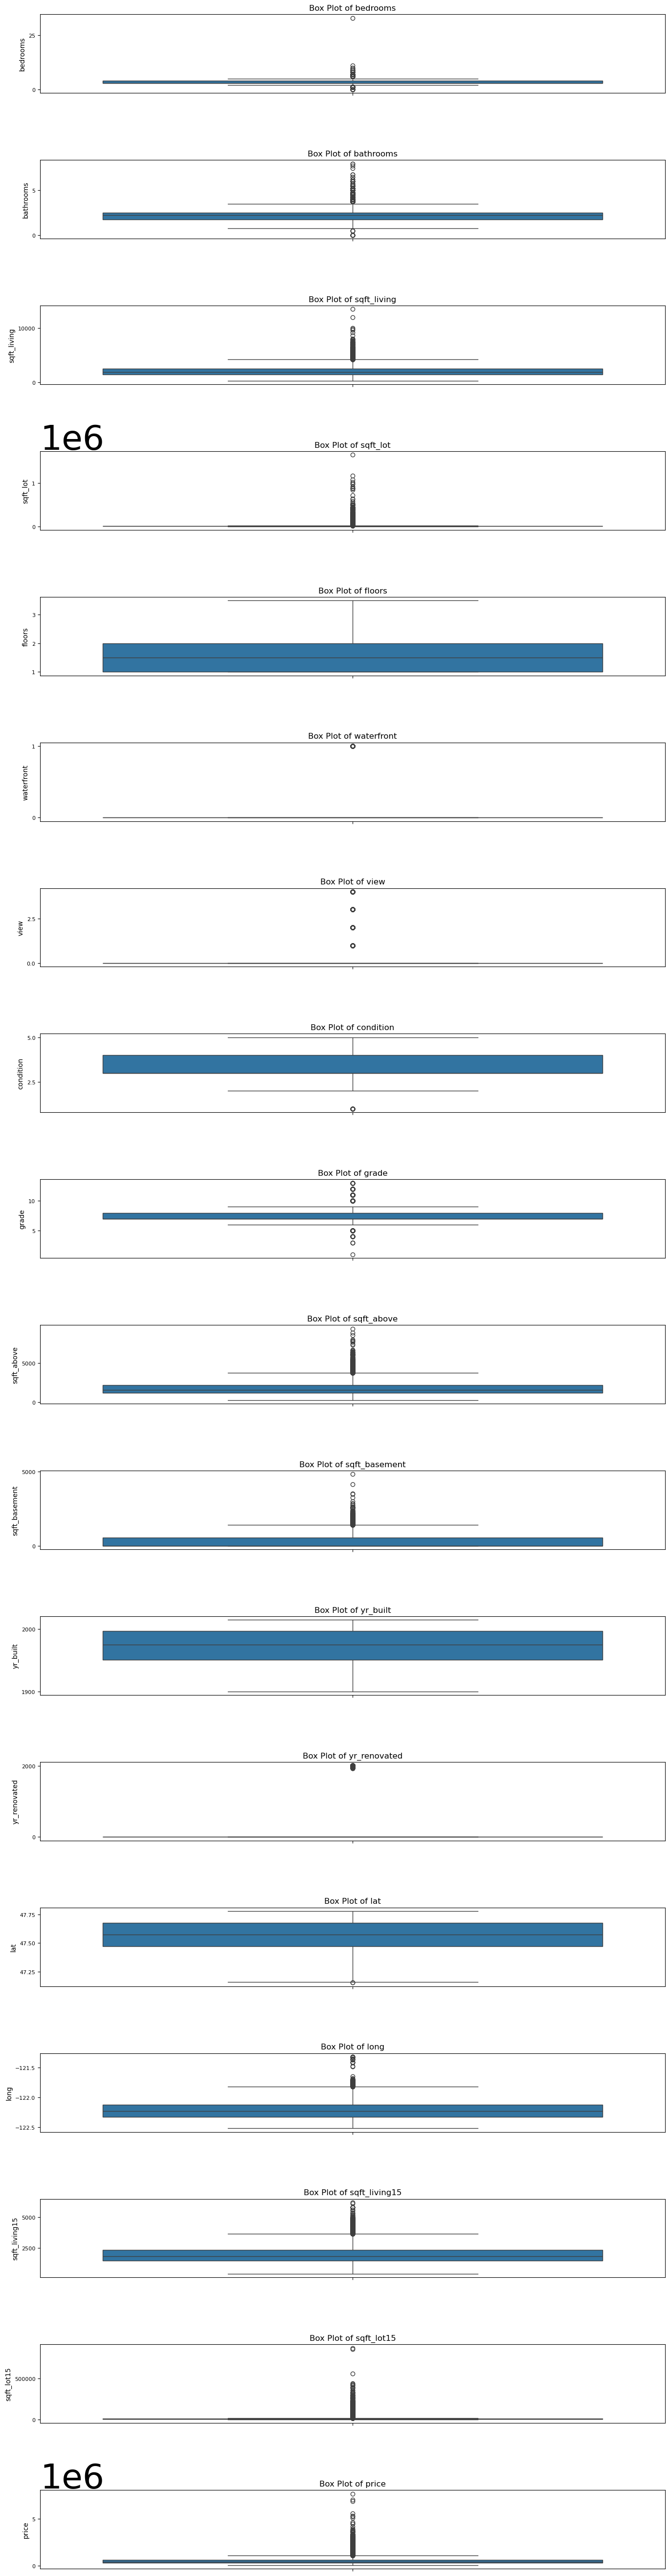

In [1051]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Studie columns' values

 ##### Column 'bedrooms'

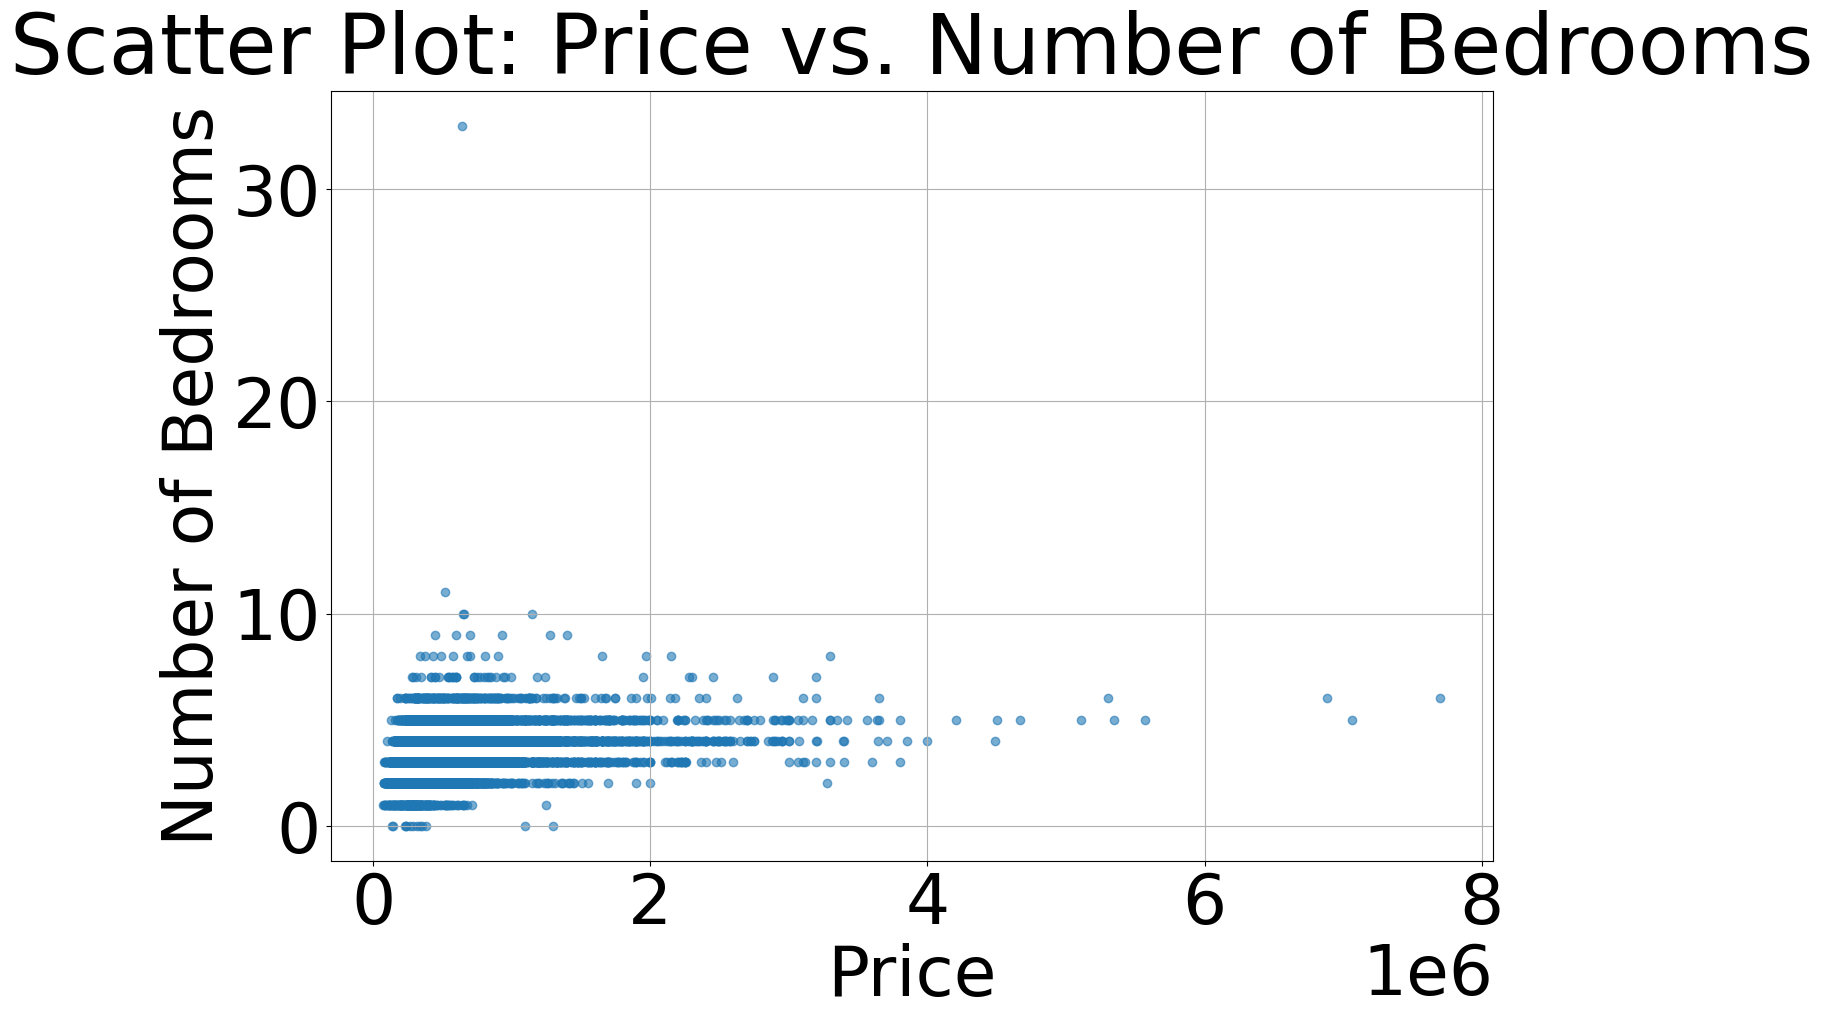

In [1056]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['bedrooms'], alpha=0.6)

plt.title('Scatter Plot: Price vs. Number of Bedrooms')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')

plt.grid(True)
plt.show()

 ##### Column 'bathrooms'

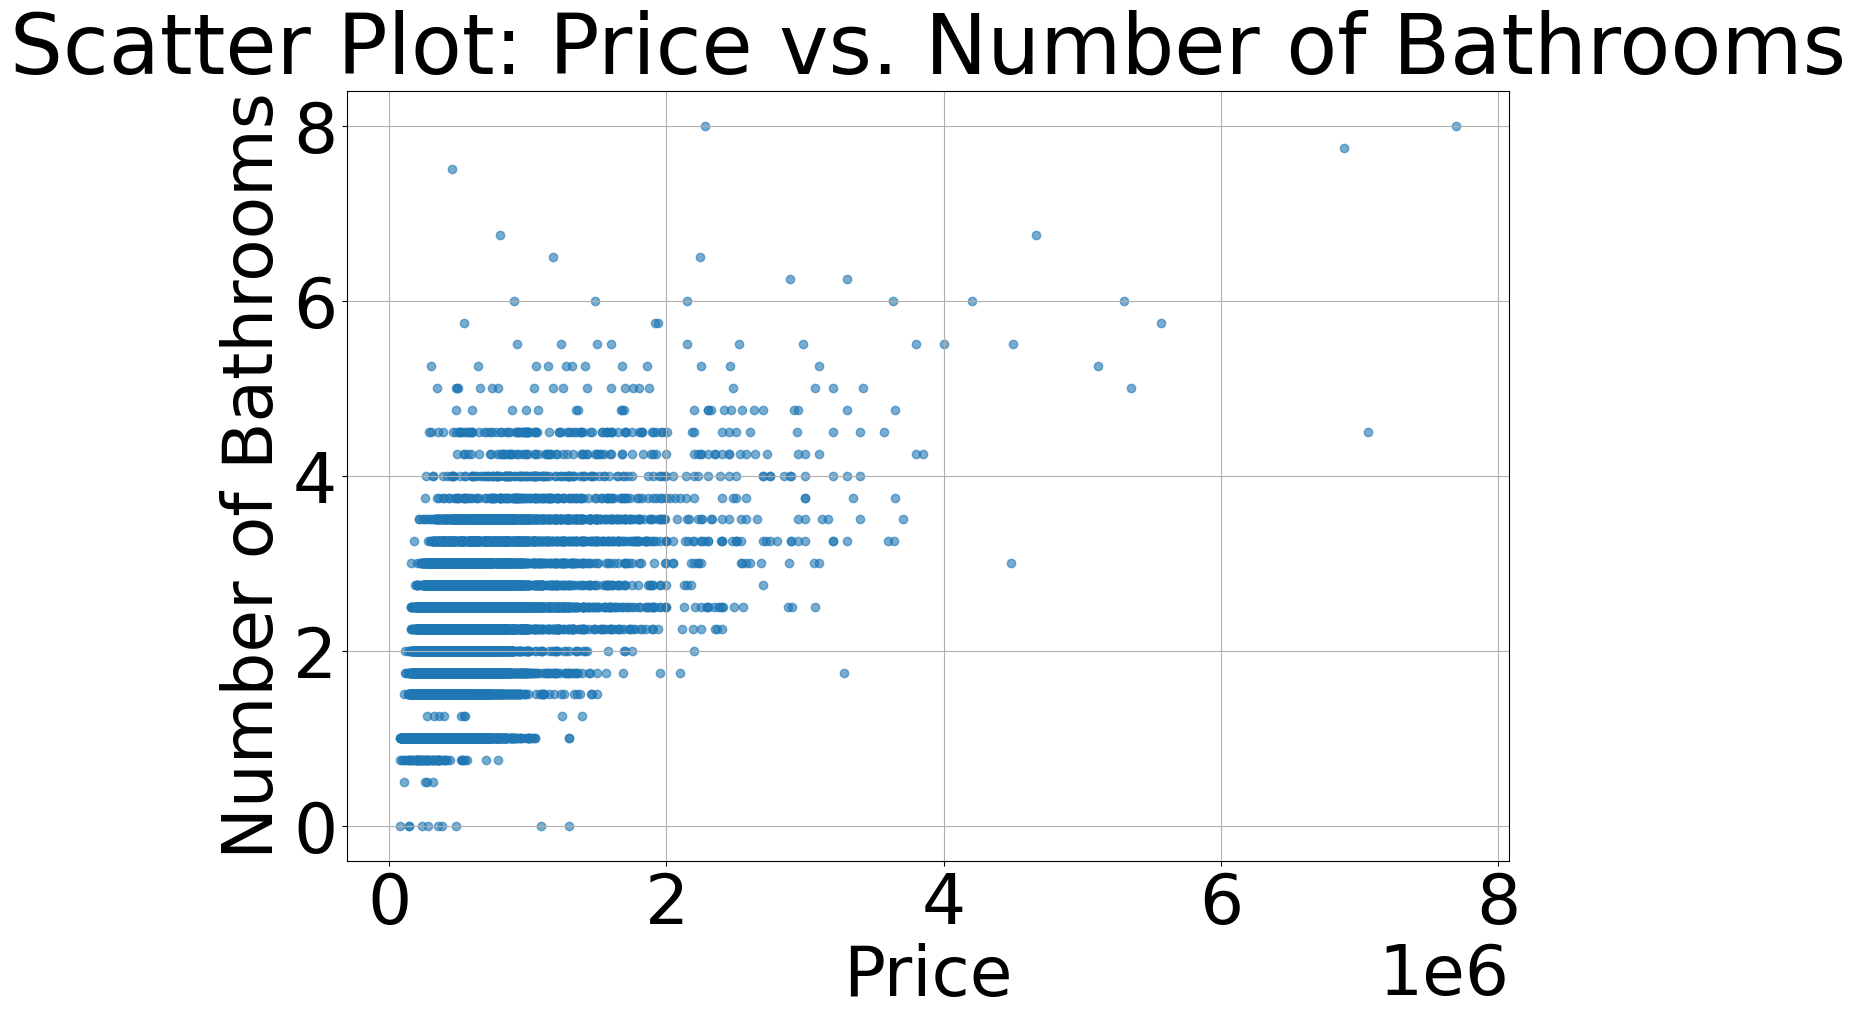

In [1063]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['bathrooms'], alpha=0.6)

plt.title('Scatter Plot: Price vs. Number of Bathrooms')
plt.xlabel('Price')
plt.ylabel('Number of Bathrooms')

plt.grid(True)
plt.show()

 ##### Column 'sqft _living'

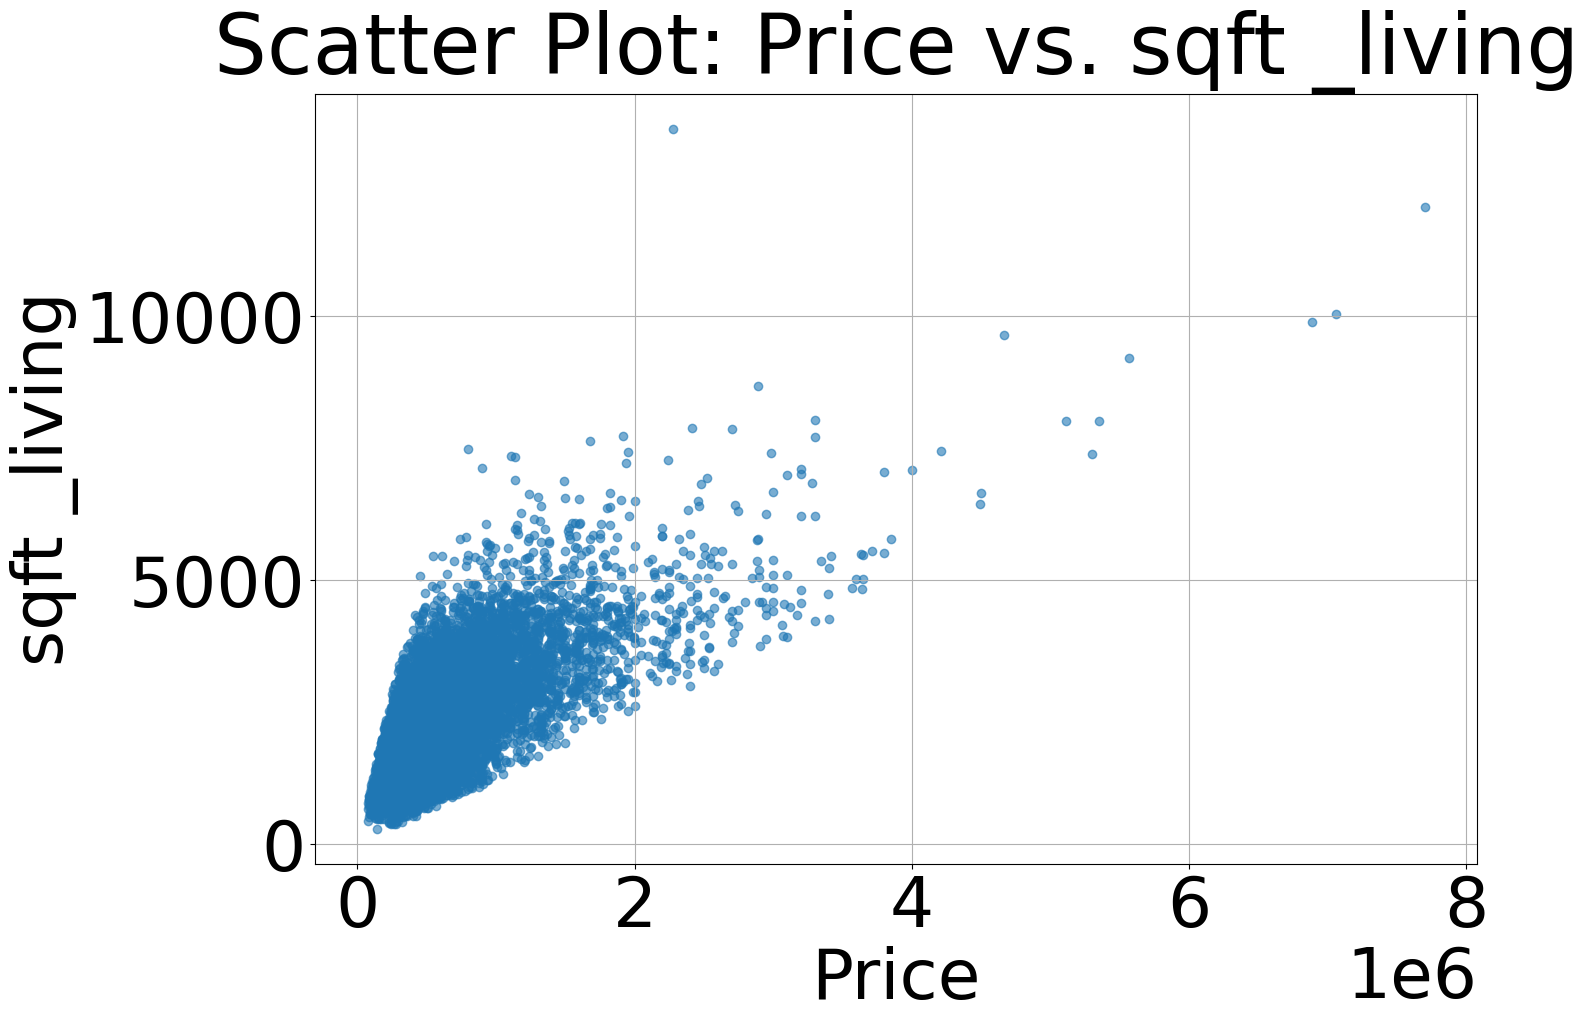

In [1068]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['sqft_living'], alpha=0.6)

plt.title('Scatter Plot: Price vs. sqft _living')
plt.xlabel('Price')
plt.ylabel('sqft _living')

plt.grid(True)
plt.show()

 ##### Column 'sqft_lot'

In [1071]:
df.sqft_lot.describe()

count     21613.000000
mean      15106.967566
std       41420.511515
min         520.000000
25%        5040.000000
50%        7618.000000
75%       10688.000000
max     1651359.000000
Name: sqft_lot, dtype: float64

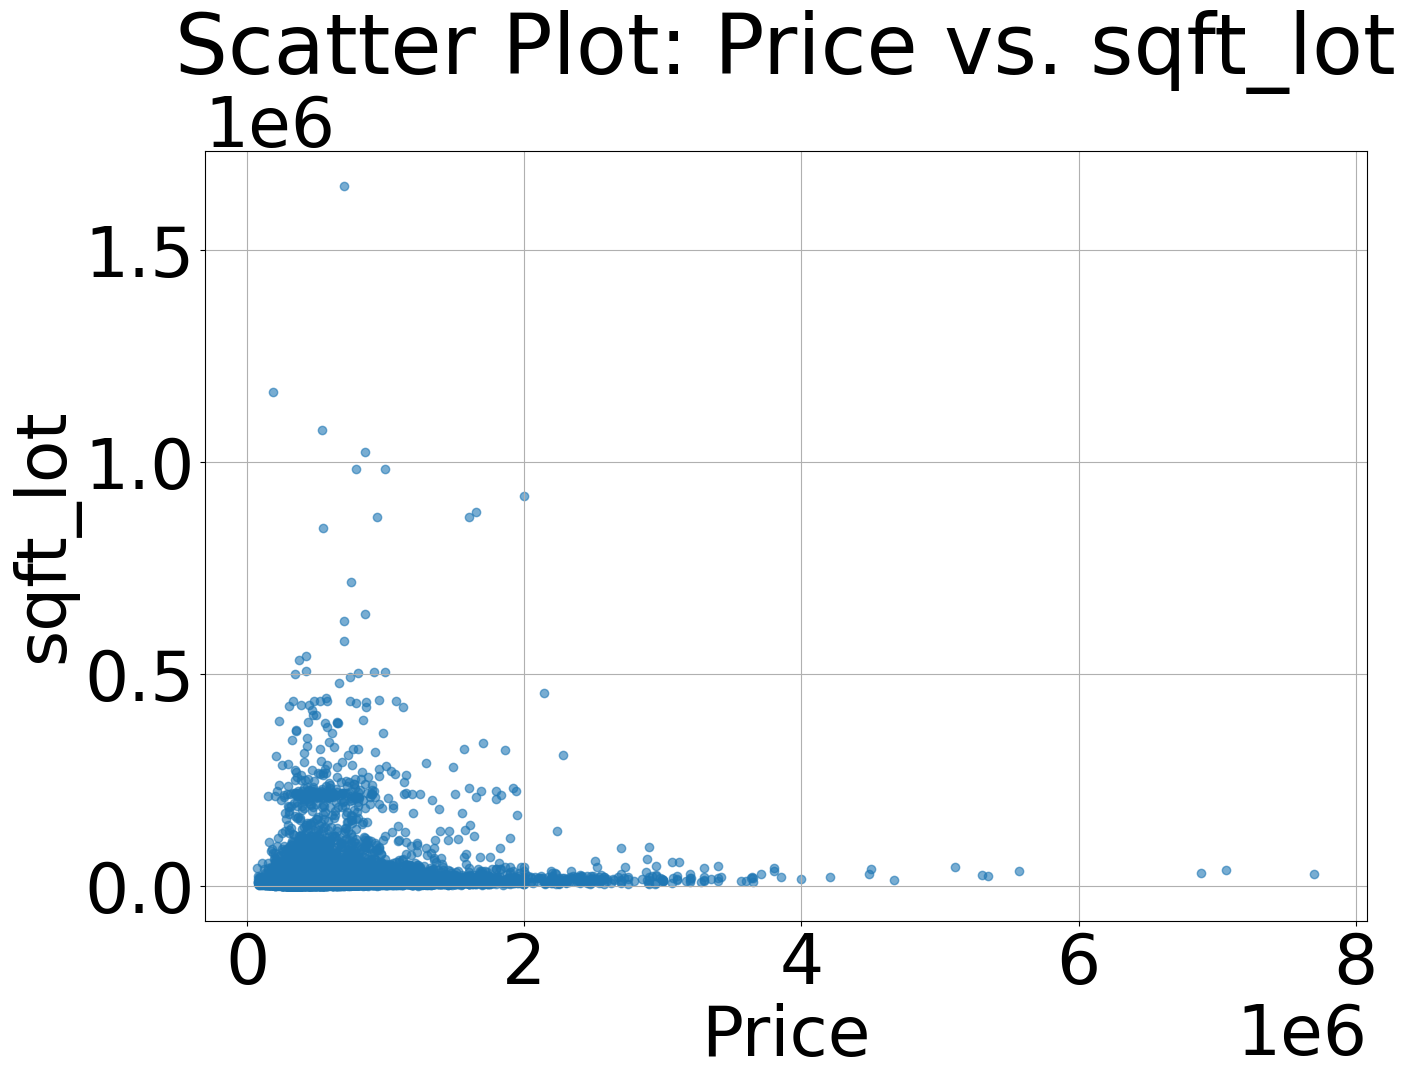

In [1073]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['sqft_lot'], alpha=0.6)

plt.title('Scatter Plot: Price vs. sqft_lot')
plt.xlabel('Price')
plt.ylabel('sqft_lot')

plt.grid(True)
plt.show()

 ##### Column 'floors'

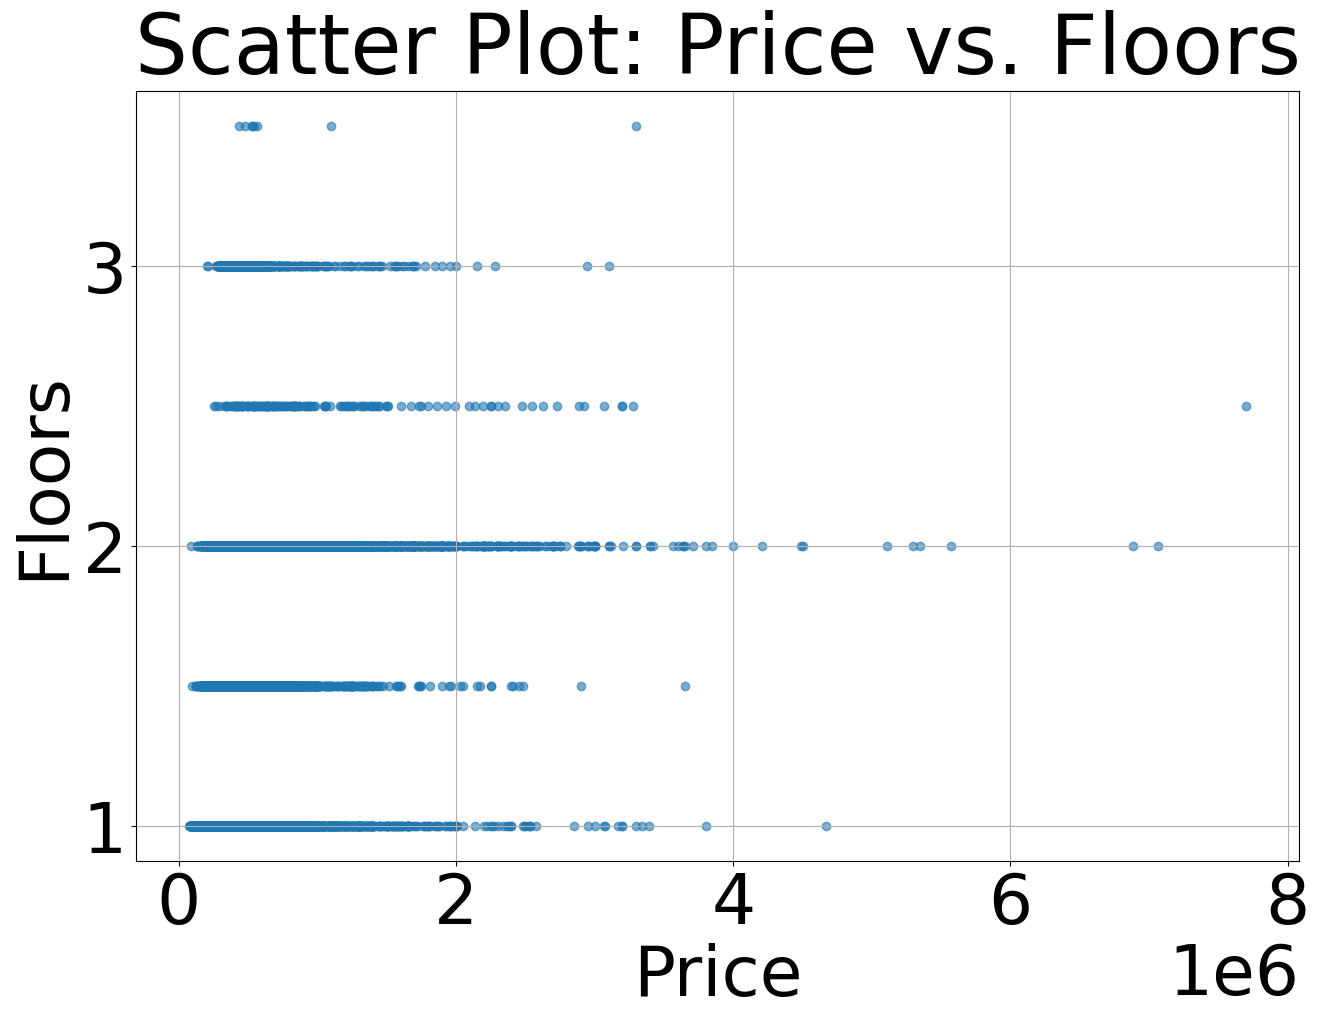

In [1086]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['floors'], alpha=0.6)

plt.title('Scatter Plot: Price vs. Floors')
plt.xlabel('Price')
plt.ylabel('Floors')

plt.grid(True)
plt.show()

 ##### Column 'waterfront'

In [1089]:
df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [1091]:
df.query('waterfront == 1')[['price', 'waterfront']].describe()

price  waterfront
count     163.000000  163.000000
mean  1661876.024540    1.000000
std   1120371.731212    0.000000
min    285000.000000    1.000000
25%    760000.000000    1.000000
50%   1400000.000000    1.000000
75%   2215000.000000    1.000000
max   7062500.000000    1.000000

In [1093]:
df[['price', 'waterfront']].describe()

price   waterfront
count   21613.000000 21613.000000
mean   540088.141767     0.007542
std    367127.196483     0.086517
min     75000.000000     0.000000
25%    321950.000000     0.000000
50%    450000.000000     0.000000
75%    645000.000000     0.000000
max   7700000.000000     1.000000

 ##### Column 'view'

In [1096]:
df.view.value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

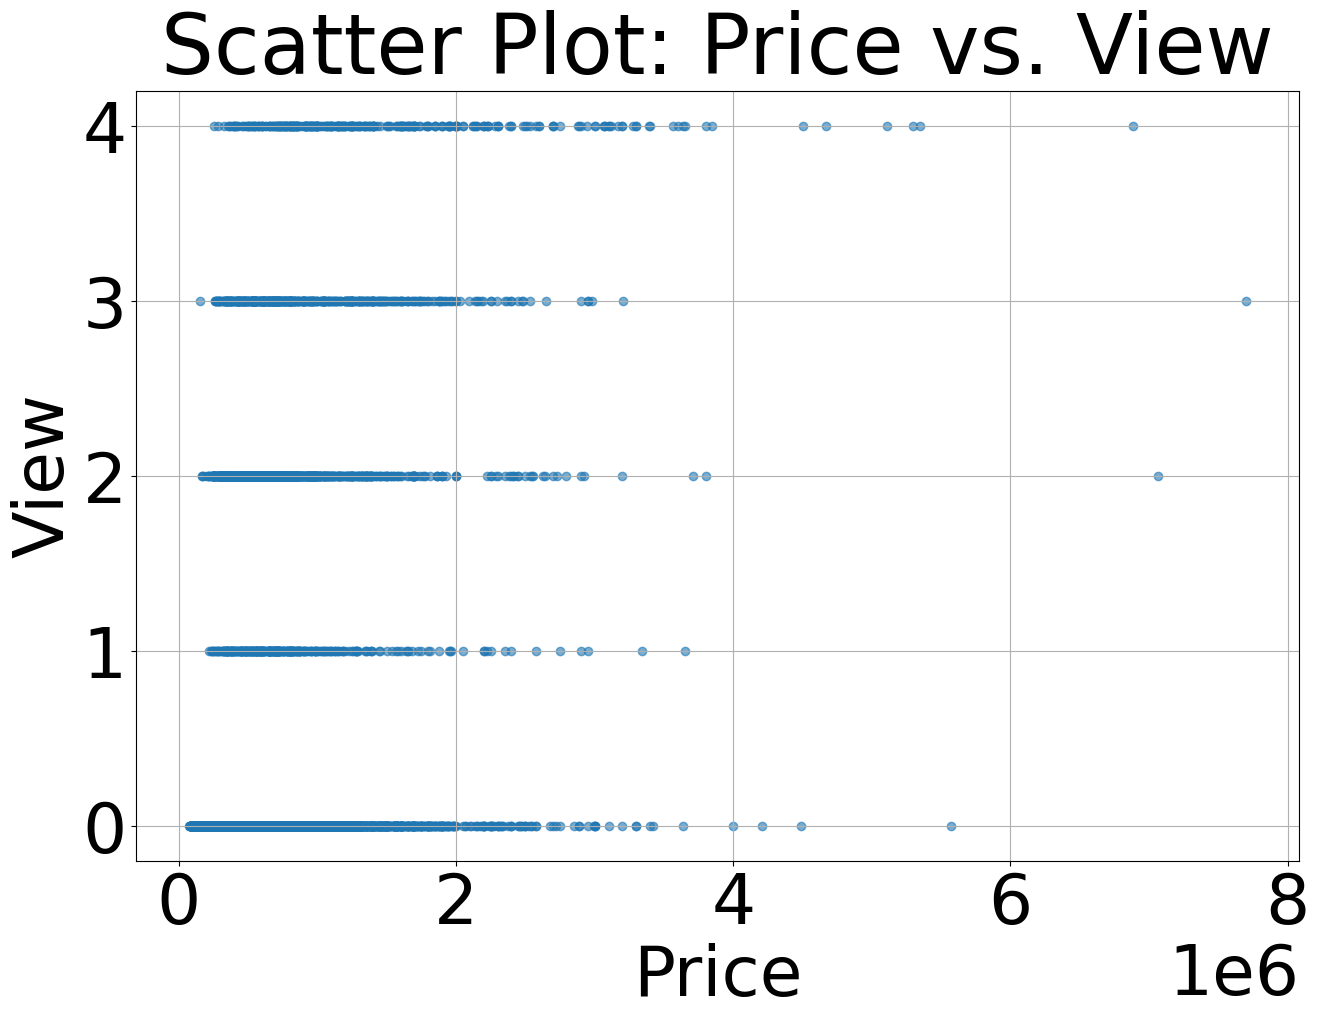

In [1098]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['view'], alpha=0.6)

plt.title('Scatter Plot: Price vs. View')
plt.xlabel('Price')
plt.ylabel('View')

plt.grid(True)
plt.show()

 ##### Column 'condition'

In [1101]:
df.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

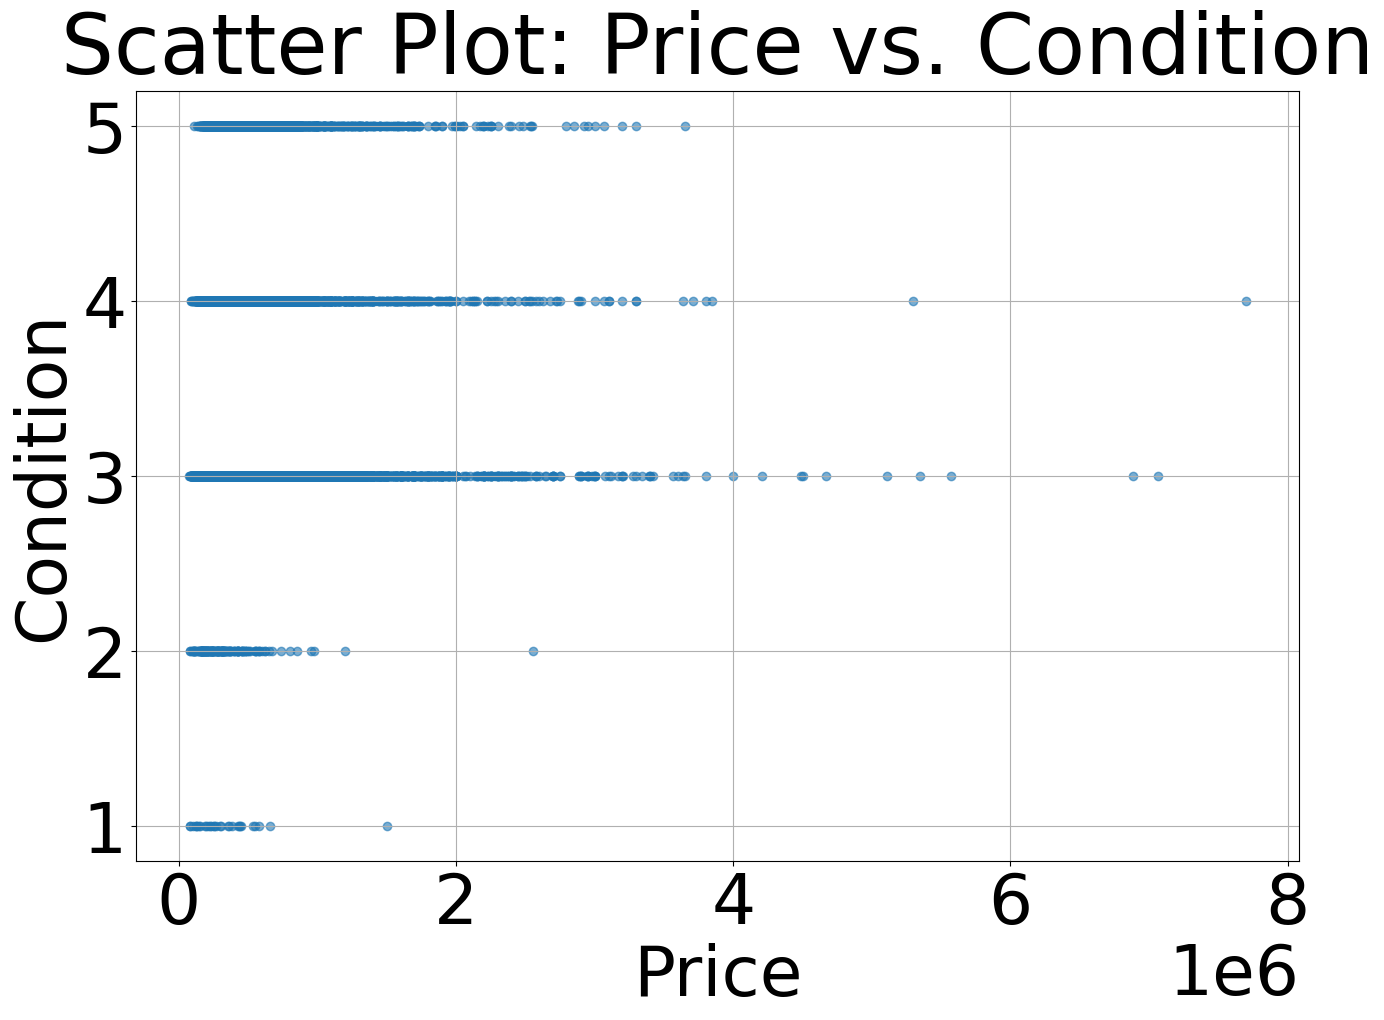

In [1103]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['condition'], alpha=0.6)

plt.title('Scatter Plot: Price vs. Condition')
plt.xlabel('Price')
plt.ylabel('Condition')

plt.grid(True)
plt.show()

 ##### Column 'grade'

In [1106]:
df.grade.value_counts().sort_index()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

 ##### Column 'sqft_above'

In [1109]:
df.sqft_above.describe()

count   21613.000000
mean     1788.390691
std       828.090978
min       290.000000
25%      1190.000000
50%      1560.000000
75%      2210.000000
max      9410.000000
Name: sqft_above, dtype: float64

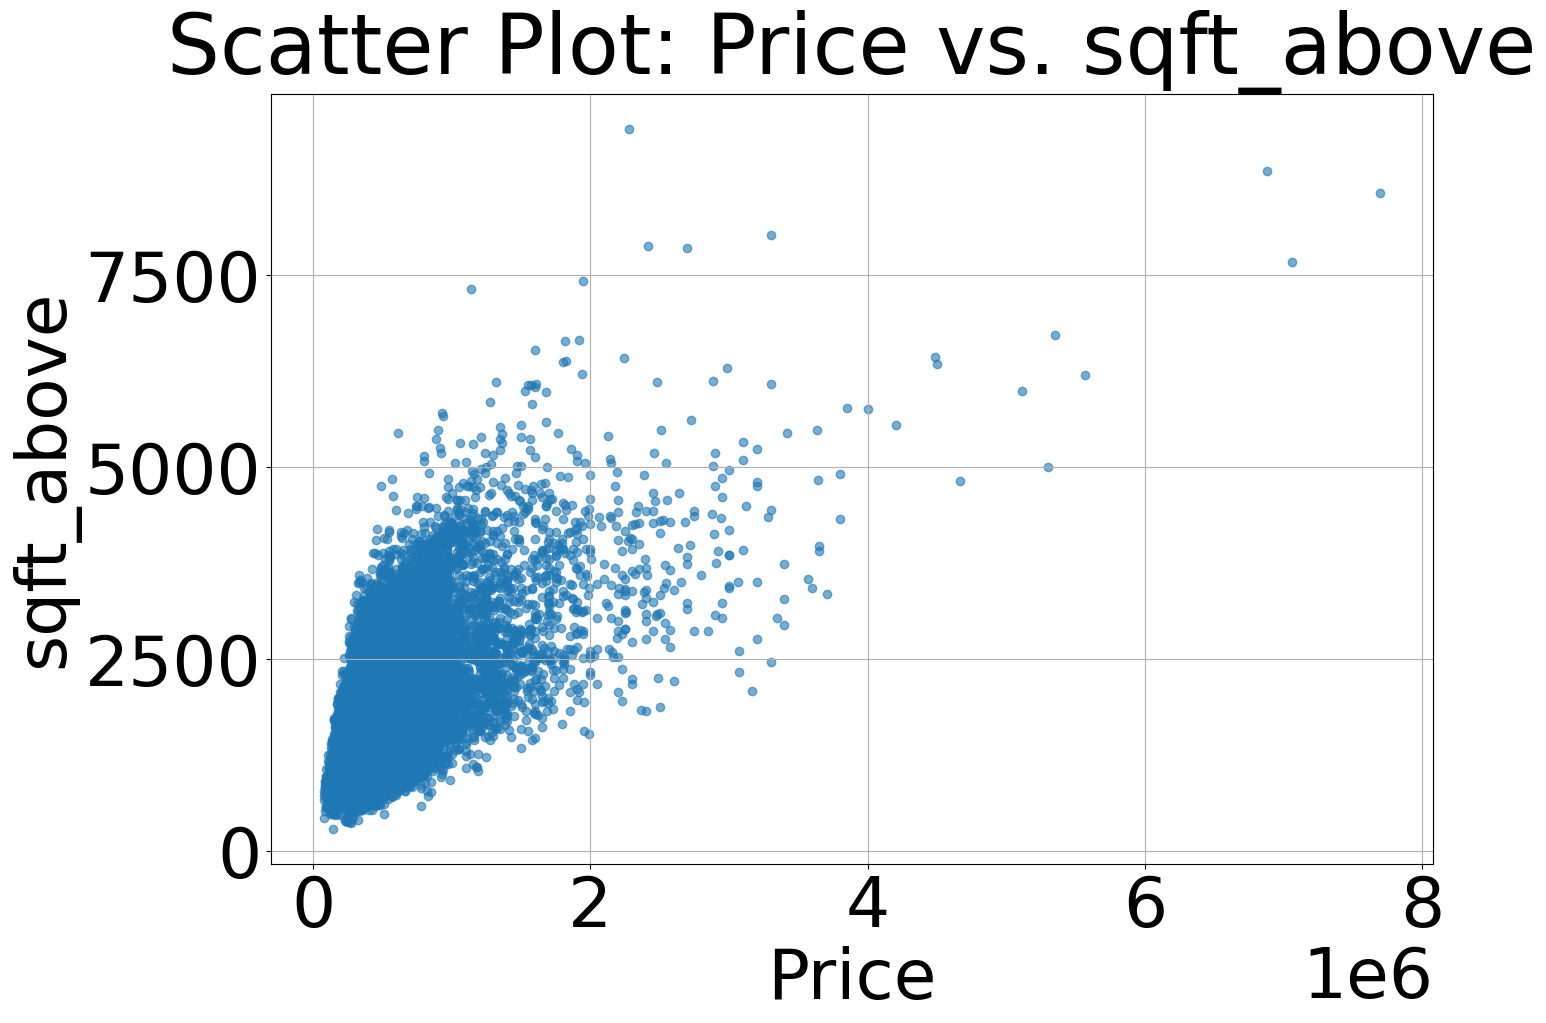

In [1111]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['sqft_above'], alpha=0.6)

plt.title('Scatter Plot: Price vs. sqft_above')
plt.xlabel('Price')
plt.ylabel('sqft_above')

plt.grid(True)
plt.show()

 ##### Columns 'sqft_basement'

In [1114]:
df.sqft_basement.describe()

count   21613.000000
mean      291.509045
std       442.575043
min         0.000000
25%         0.000000
50%         0.000000
75%       560.000000
max      4820.000000
Name: sqft_basement, dtype: float64

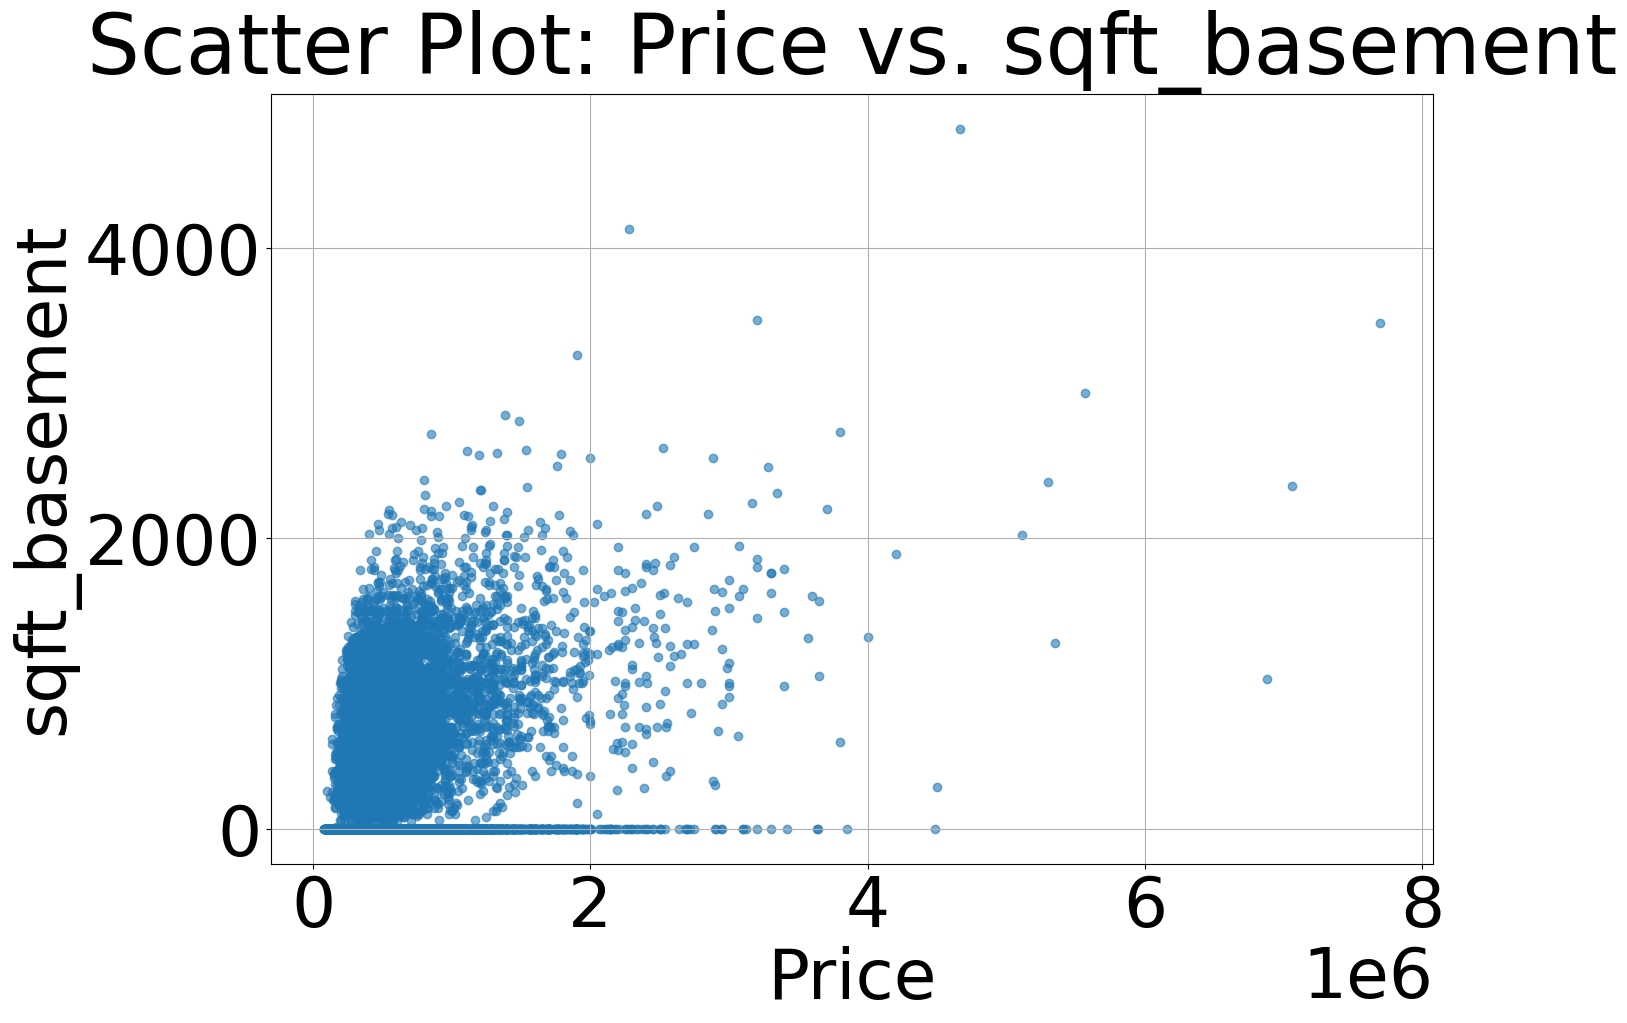

In [1116]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['sqft_basement'], alpha=0.6)

plt.title('Scatter Plot: Price vs. sqft_basement')
plt.xlabel('Price')
plt.ylabel('sqft_basement')

plt.grid(True)
plt.show()

 ##### Column 'yr_built'

In [1125]:
df.yr_built.describe()

count   21613.000000
mean     1971.005136
std        29.373411
min      1900.000000
25%      1951.000000
50%      1975.000000
75%      1997.000000
max      2015.000000
Name: yr_built, dtype: float64

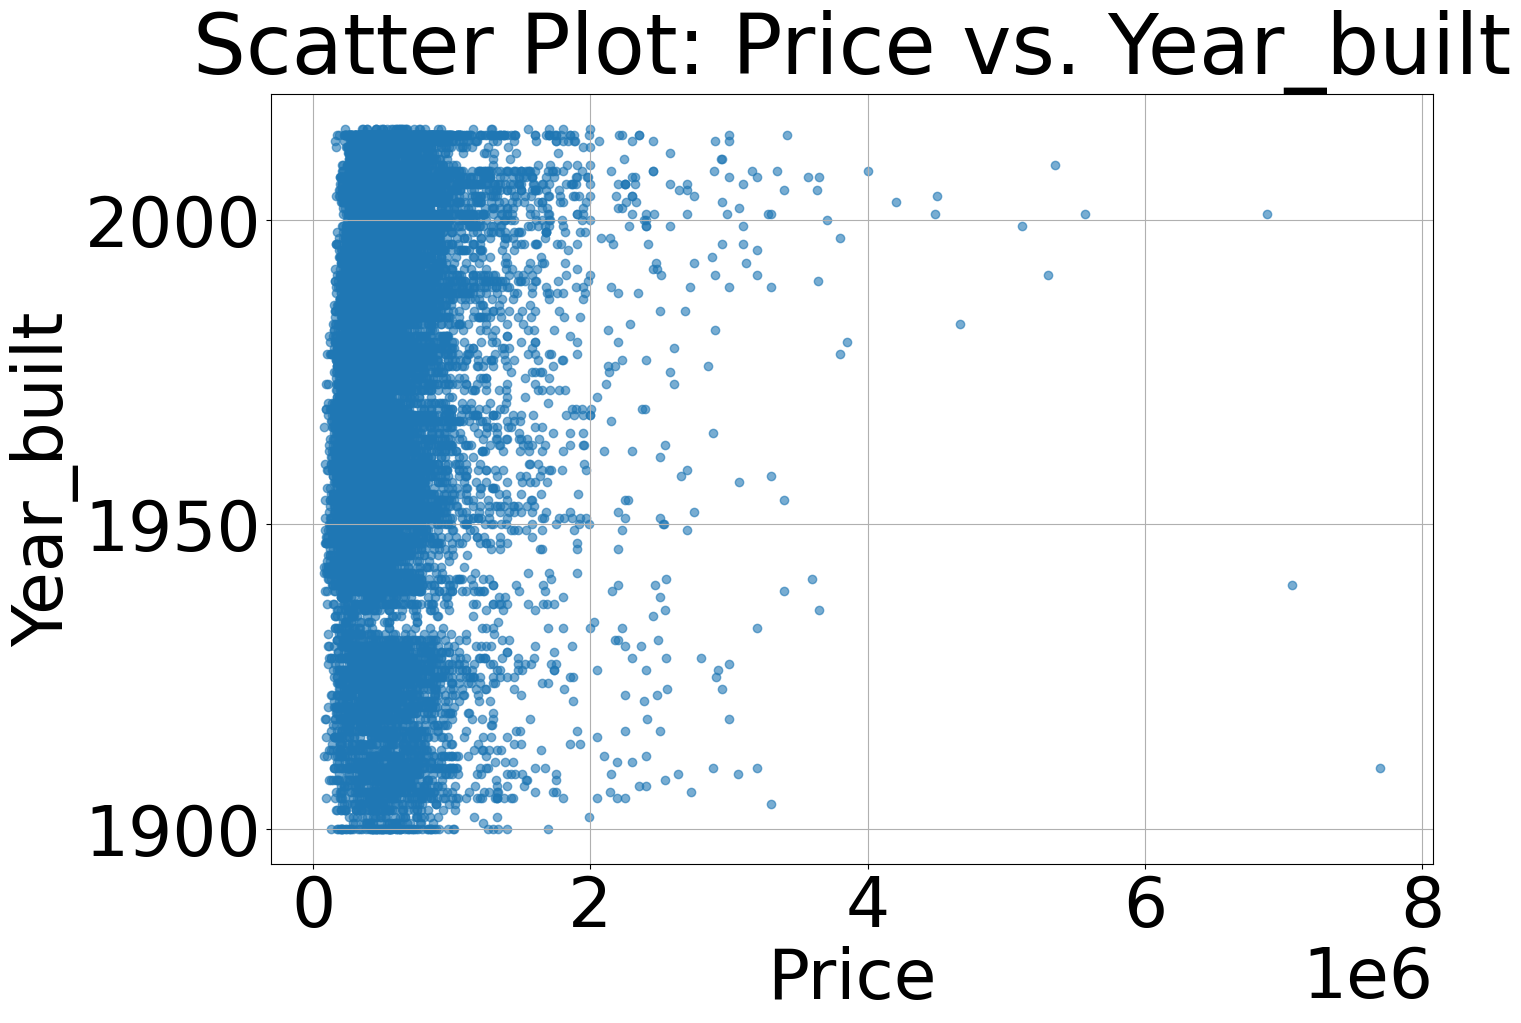

In [1127]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['yr_built'], alpha=0.6)

plt.title('Scatter Plot: Price vs. Year_built')
plt.xlabel('Price')
plt.ylabel('Year_built')

plt.grid(True)
plt.show()

 ##### Column 'yr_renovated'

In [1130]:
df.yr_renovated.describe()

count   21613.000000
mean       84.402258
std       401.679240
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2015.000000
Name: yr_renovated, dtype: float64

In [1132]:
df.query('yr_renovated !=0')

date  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
1      20141209T000000         3   2.250000         2570      7242 2.000000   
35     20140613T000000         3   2.500000         2300      3060 1.500000   
95     20140908T000000         4   2.500000         3300     10250 1.000000   
103    20141007T000000         3   2.500000         2920      8113 2.000000   
115    20141121T000000         3   3.500000         4380      6350 2.000000   
...                ...       ...        ...          ...       ...      ...   
19622  20150114T000000         3   1.750000         1760      6788 2.000000   
20057  20140904T000000         3   2.000000         1520      5040 2.000000   
20444  20150225T000000         4   2.500000         2400      9612 1.000000   
20447  20150212T000000         3   1.500000         1010      1546 2.000000   
20962  20150311T000000         2   1.000000          828      4524 1.000000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1               0     0          3      7        2170            400   
35              0     0          3      8        1510            790   
95              0     0          3      7        2390            910   
103             0     0          3      8        2920              0   
115             0     0          3      8        2780           1600   
...           ...   ...        ...    ...         ...            ...   
19622           1     4          3      7        1760              0   
20057           0     0          3      7        1520              0   
20444           0     0          3      8        1230           1170   
20447           0     0          3      8        1010              0   
20962           0     0          3      6         828              0   

       yr_built  yr_renovated       lat        long  sqft_living15  \
1          1951          1991 47.721000 -122.319000           1690   
35         1930          2002 47.682700 -122.310000           1590   
95         1946          1991 47.587300 -122.249000           1950   
103        1950          2010 47.581400 -122.196000           2370   
115        1900          1999 47.698100 -122.368000           1830   
...         ...           ...       ...         ...            ...   
19622      1940          1960 47.733600 -122.284000           1630   
20057      1977          2006 47.777000 -122.362000           1860   
20444      1962          2009 47.479900 -122.127000           2430   
20447      1971          2014 47.599800 -122.311000           1010   
20962      1968          2007 47.265500 -122.244000            828   

       sqft_lot15          price  
1            7639  538000.000000  
35           3264  696000.000000  
95           6045  905000.000000  
103          8113 1088000.000000  
115          6350  740500.000000  
...           ...            ...  
19622        7588 1150000.000000  
20057        8710  434900.000000  
20444        5539  500012.000000  
20447        1517  356999.000000  
20962        5402  110000.000000  

[914 rows x 19 columns]

 ##### Column 'sqft_living15'

In [1145]:
df.sqft_living15.describe()

count   21613.000000
mean     1986.552492
std       685.391304
min       399.000000
25%      1490.000000
50%      1840.000000
75%      2360.000000
max      6210.000000
Name: sqft_living15, dtype: float64

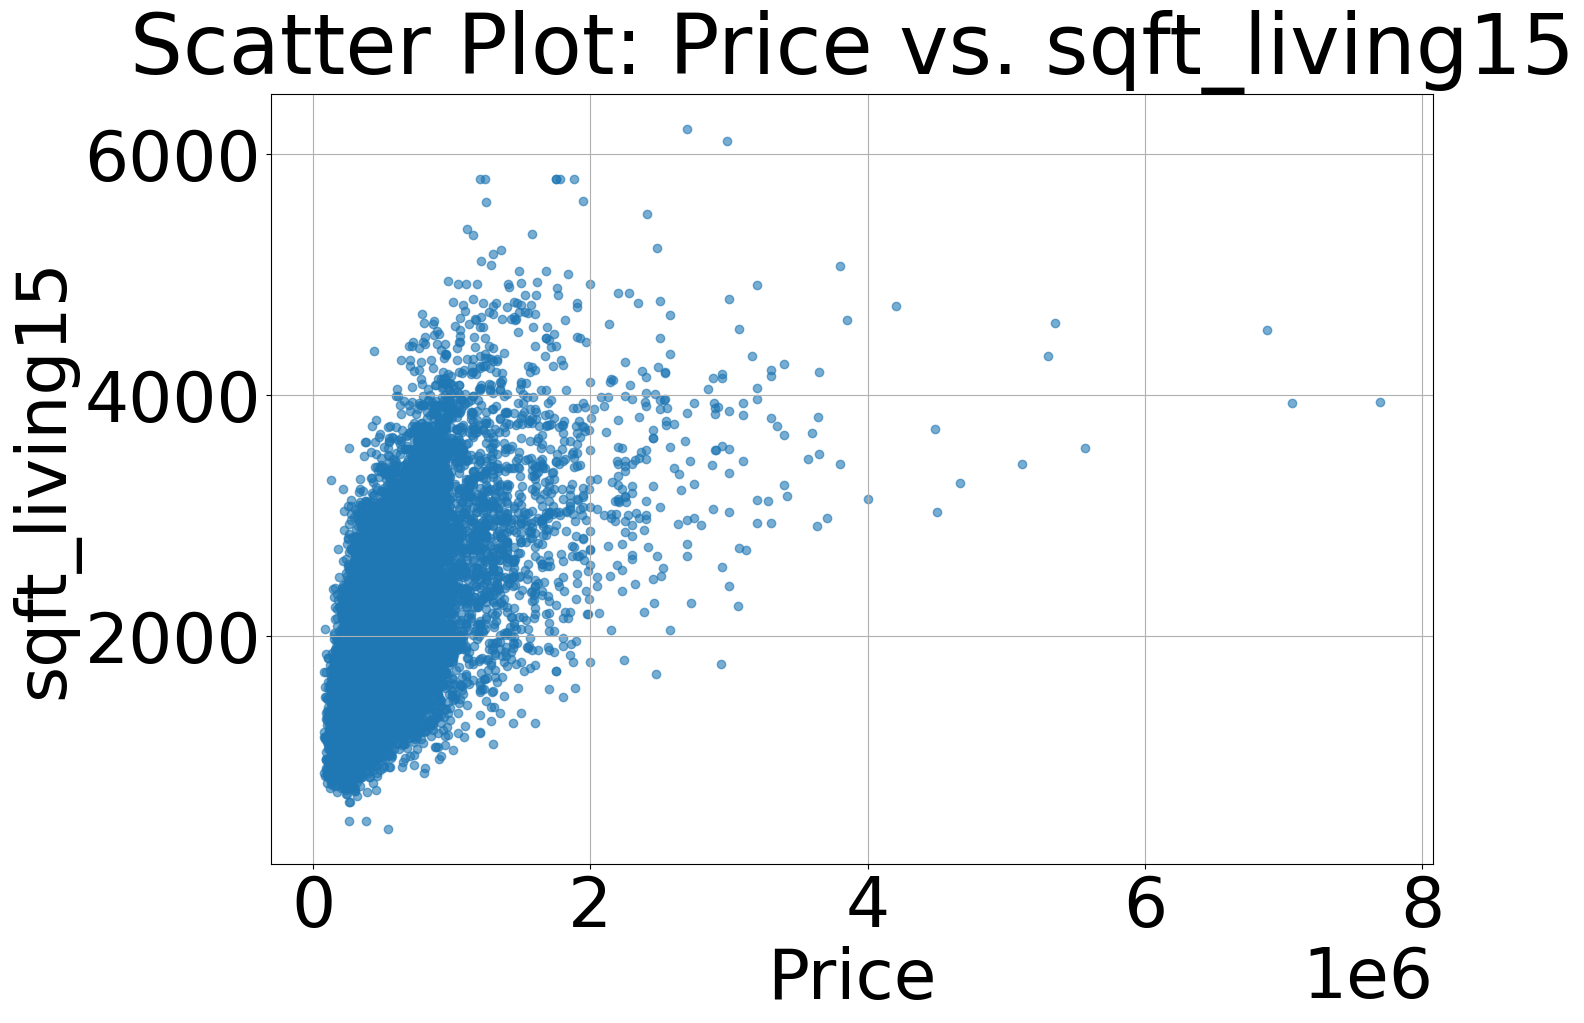

In [1147]:
plt.figure(figsize=(15, 10))
plt.scatter(df['price'], df['sqft_living15'], alpha=0.6)

plt.title('Scatter Plot: Price vs. sqft_living15')
plt.xlabel('Price')
plt.ylabel('sqft_living15')

plt.grid(True)
plt.show()

 ##### Column 'sqft_lot15'

In [1150]:
df.sqft_lot15.describe()

count    21613.000000
mean     12768.455652
std      27304.179631
min        651.000000
25%       5100.000000
50%       7620.000000
75%      10083.000000
max     871200.000000
Name: sqft_lot15, dtype: float64

 ## Data preparation

In [1167]:
# Select a features and target
features = df.drop(['price','date'], axis=1)
target = df['price']

# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data price
350000.000000     140
450000.000000     139
500000.000000     129
550000.000000     129
425000.000000     122
                 ... 
1437500.000000      1
696950.000000       1
182700.000000       1
774888.000000       1
995500.000000       1
Name: count, Length: 3526, dtype: int64

Test data price
450000.000000    33
475000.000000    32
350000.000000    32
325000.000000    31
550000.000000    30
                 ..
926250.000000     1
799200.000000     1
366400.000000     1
574500.000000     1
457500.000000     1
Name: count, Length: 1565, dtype: int64


 #### Write the function for metrics

In [1170]:
def metrics(predictions, target):
    mae = mean_absolute_error(target, predictions)
    mse = mean_squared_error(target, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(target, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'mape': mape}

 ### Train Linear Regression model

In [1173]:
fit_intercepts = [True, False]
best_result = 0
linear_regres, best_fit_intercept = None, None

for fit_intercept in fit_intercepts:
    model = LinearRegression(fit_intercept=fit_intercept)
    
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
    result = np.mean(scores)  

    if result > best_result:
        linear_regres = model
        best_result = result
        best_fit_intercept = fit_intercept



# Train model
linear_regres.fit(features_train, target_train)

# Received predictions
predictions = linear_regres.predict(features_test)

lin_reg = metrics(predictions, target_test)


print(f'The best parameters: fit_intercept={best_fit_intercept}')
print(f'Metrics: {lin_reg}')

The best parameters: fit_intercept=True
Metrics: {'MAE': 124891.78379861696, 'MSE': 35106805241.88968, 'RMSE': 187368.10091872542, 'mape': 0.2591799852691263}


 #### Train DecisionTree Model

In [1176]:
min_samples_splits = [2, 5, 10]
best_result = 0
best_params = None
decision_tree_regressor = None

for max_depth in range(1, 16):
    for min_samples_split in min_samples_splits:
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            decision_tree_regressor = model
            best_result = result
            best_params = (max_depth, min_samples_split)

# Train model
decision_tree_regressor.fit(features_train, target_train)

# Receive predictions
predictions = decision_tree_regressor.predict(features_test)


dec_reg = metrics(predictions, target_test)

print(f'The best parameters: max_depth={best_params[0]}, min_samples_split={best_params[1]}')
print(f'Metrics: {dec_reg}')

The best parameters: max_depth=10, min_samples_split=5
Metrics: {'MAE': 90405.46099055294, 'MSE': 27139464751.205906, 'RMSE': 164740.59836969728, 'mape': 0.1684658195545792}


 #### Train Randomforest Model

In [1178]:
n_estimators_options = [50, 100, 200]
max_depths = range(1, 16)
best_result = 0
best_params = None
random_forest_regressor = None

for n_estimators in n_estimators_options:
    for max_depth in max_depths:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores) 

        if result > best_result:
            random_forest_regressor = model
            best_result = result
            best_params = (n_estimators, max_depth)

# Train model
random_forest_regressor.fit(features_train, target_train)

# Receive predictions
predictions = random_forest_regressor.predict(features_test)

rf_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_estimators={best_params[0]}, max_depth={best_params[1]}')
print(f'Metrics: {rf_metrics}')

The best parameters: n_estimators=200, max_depth=14
Metrics: {'MAE': 68159.99070866819, 'MSE': 13910536250.293943, 'RMSE': 117942.93641542907, 'mape': 0.1314006156103778}


 #### Train KNeighborsRegressor model

In [1180]:
n_neighbors_options = [3, 5, 7, 10, 15]
weights_options = ['uniform', 'distance']
best_result = 0
best_params = None
knn_regressor = None

for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            knn_regressor = model
            best_result = result
            best_params = (n_neighbors, weights)

# Train model
knn_regressor.fit(features_train, target_train)

# Receive predictions
predictions = knn_regressor.predict(features_test)

knn_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_neighbors={best_params[0]}, weights={best_params[1]}')
print(f'Metrics: {knn_metrics}')

The best parameters: n_neighbors=7, weights=distance
Metrics: {'MAE': 85577.04168244355, 'MSE': 21471459728.864025, 'RMSE': 146531.42915041817, 'mape': 0.16445640773206296}


 #### Train LGBMRegressor model

In [1182]:
lgbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, -1]  # -1 означает отсутствие ограничения
}

best_result_lgbm = 0
best_params_lgbm = None
lgbm_regressor = None

for n_estimators in lgbm_params['n_estimators']:
    for learning_rate in lgbm_params['learning_rate']:
        for max_depth in lgbm_params['max_depth']:
            model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, verbose=-1)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_lgbm:
                lgbm_regressor = model
                best_result_lgbm = result
                best_params_lgbm = (n_estimators, learning_rate, max_depth)

# Обучение модели
lgbm_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_lgbm = lgbm_regressor.predict(features_test)

# Вычисление метрик
lgbm_metrics = metrics(predictions_lgbm, target_test)

print(f'LGBM - The best parameters: n_estimators={best_params_lgbm[0]}, learning_rate={best_params_lgbm[1]}, max_depth={best_params_lgbm[2]}')
print(f'LGBM - Metrics: {lgbm_metrics}')

LGBM - The best parameters: n_estimators=150, learning_rate=0.2, max_depth=5
LGBM - Metrics: {'MAE': 66865.61743510982, 'MSE': 12912501138.031883, 'RMSE': 113633.18678111551, 'mape': 0.12893344692665148}


 #### Train CatBoostRegressor model

In [1184]:
catboost_params = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

best_result_catboost = 0
best_params_catboost = None
catboost_regressor = None

for iterations in catboost_params['iterations']:
    for learning_rate in catboost_params['learning_rate']:
        for depth in catboost_params['depth']:
            model = CatBoostRegressor(iterations=iterations, learning_rate=learning_rate, depth=depth, verbose=0)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_catboost:
                catboost_regressor = model
                best_result_catboost = result
                best_params_catboost = (iterations, learning_rate, depth)

# Обучение модели
catboost_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_catboost = catboost_regressor.predict(features_test)

# Вычисление метрик
catboost_metrics = metrics(predictions_catboost, target_test)

print(f'CatBoost - The best parameters: iterations={best_params_catboost[0]}, learning_rate={best_params_catboost[1]}, depth={best_params_catboost[2]}')
print(f'CatBoost - Metrics: {catboost_metrics}')

CatBoost - The best parameters: iterations=150, learning_rate=0.2, depth=7
CatBoost - Metrics: {'MAE': 65559.41885324559, 'MSE': 12646527149.755606, 'RMSE': 112456.77902979263, 'mape': 0.12666061349022986}


 #### Train MLPRegressor model

In [1186]:
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300]
}

best_result_mlp = 0
best_params_mlp = None
mlp_regressor = None

for hidden_layer_sizes in mlp_params['hidden_layer_sizes']:
    for activation in mlp_params['activation']:
        for learning_rate_init in mlp_params['learning_rate_init']:
            for max_iter in mlp_params['max_iter']:
                model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                                     activation=activation,
                                     learning_rate_init=learning_rate_init,
                                     max_iter=max_iter,
                                     random_state=42,
                                     verbose=0)
                
                scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
                result = np.mean(scores)

                if result > best_result_mlp:
                    mlp_regressor = model
                    best_result_mlp = result
                    best_params_mlp = (hidden_layer_sizes, activation, learning_rate_init, max_iter)

# Обучение модели
mlp_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_mlp = mlp_regressor.predict(features_test)

# Вычисление метрик
mlp_metrics = metrics(predictions_mlp, target_test)

print(f'MLP - The best parameters: hidden_layer_sizes={best_params_mlp[0]}, activation={best_params_mlp[1]}, learning_rate_init={best_params_mlp[2]}, max_iter={best_params_mlp[3]}')
print(f'MLP - Metrics: {mlp_metrics}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

MLP - The best parameters: hidden_layer_sizes=(50, 50), activation=relu, learning_rate_init=0.1, max_iter=300
MLP - Metrics: {'MAE': 69098.81492916704, 'MSE': 15682292786.016836, 'RMSE': 125228.96145068375, 'mape': 0.13214811354025158}


 ## Conclusion

In [1203]:
model_metrics = [lin_reg, dec_reg, rf_metrics, knn_metrics, lgbm_metrics, catboost_metrics, mlp_metrics]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighborsClassifier', 'LGBM', 'CatBoost', 'MLPClassifier'])
print(total.sort_values(by='mape', ascending=True))

                               MAE                MSE          RMSE     mape
CatBoost              65559.418853 12646527149.755606 112456.779030 0.126661
LGBM                  66865.617435 12912501138.031883 113633.186781 0.128933
RandomForest          68159.990709 13910536250.293943 117942.936415 0.131401
MLPClassifier         69098.814929 15682292786.016836 125228.961451 0.132148
KNeighborsClassifier  85577.041682 21471459728.864025 146531.429150 0.164456
DecisionTree          90405.460991 27139464751.205906 164740.598370 0.168466
LogisticRegression   124891.783799 35106805241.889679 187368.100919 0.259180


 ### Improving metrics

In [38]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    # Определяем диапазоны для гиперпараметров
    iterations = trial.suggest_int('iterations', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.3, log=True)
    depth = trial.suggest_int('depth', 3, 10)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 1, 50)

    model = CatBoostRegressor(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        min_data_in_leaf=min_data_in_leaf,
        random_seed=42,
        verbose=0 
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используем тестовую выборку
    mse = mean_squared_error(target_test, y_pred)

    return mse  # Минимизируем MSE

# Создаем объект исследования Optuna
study = optuna.create_study(direction='minimize')  # Мы минимизируем MSE
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print(best_params)

[I 2025-04-16 17:11:00,990] A new study created in memory with name: no-name-0218c1b6-5bcc-4c24-9656-85815783ae9f
[I 2025-04-16 17:11:01,609] Trial 0 finished with value: 12170801180.079025 and parameters: {'iterations': 266, 'learning_rate': 0.10233622699579005, 'depth': 7, 'l2_leaf_reg': 0.2904112678650274, 'min_data_in_leaf': 34}. Best is trial 0 with value: 12170801180.079025.
[I 2025-04-16 17:11:02,436] Trial 1 finished with value: 13667268735.322636 and parameters: {'iterations': 457, 'learning_rate': 0.018698615694877817, 'depth': 6, 'l2_leaf_reg': 0.033035479363318236, 'min_data_in_leaf': 35}. Best is trial 0 with value: 12170801180.079025.
[I 2025-04-16 17:11:04,544] Trial 2 finished with value: 47828084711.38361 and parameters: {'iterations': 384, 'learning_rate': 0.001810357495272419, 'depth': 10, 'l2_leaf_reg': 0.02334179260544051, 'min_data_in_leaf': 30}. Best is trial 0 with value: 12170801180.079025.
[I 2025-04-16 17:11:04,967] Trial 3 finished with value: 39071321856.90

{'iterations': 462, 'learning_rate': 0.07563234206808803, 'depth': 10, 'l2_leaf_reg': 0.01825765013803839, 'min_data_in_leaf': 44}


In [1199]:
model = CatBoostRegressor(
        iterations = 462,
        learning_rate=0.07563234206808803,
        depth=10,
        l2_leaf_reg=0.01825765013803839,
        min_data_in_leaf=44,
        random_state=42,
        verbose=0  
    )



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

mse = mean_squared_error(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of MLPClassifier model with specified parameters: {mse}")
print(f"All metrics: {total_metrics}")

Accuracy of MLPClassifier model with specified parameters: 12682157893.780594
All metrics: {'MAE': 62969.63037042799, 'MSE': 12682157893.780594, 'RMSE': 112615.08732750063, 'mape': 0.12025755011697974}
